In [17]:
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,16)
from IPython import display
from os import listdir
import cv2 as cv
import mmcfilters



from collections import defaultdict
def dfs(node, depth=0):
    nodes_by_depth[depth].append(node)
    for child in node.children:
        dfs(child, depth + 1)

from PrettyPrint import PrettyPrintTree
from colorama import Fore, Back
printTree = PrettyPrintTree(
    lambda node: node.children,
#    lambda node: ("id:" + str(node.id) + " " + str(node.isMaxtree)[0], "level:" + str(node.level) + " (" + str(node.residue) + ")", "|cnps|:" + str(len(node.cnps))  ), 
    lambda node: ("id:" + str(node.id) ), 
    color=Back.BLACK + Fore.WHITE
)

def mapIDs(tos):
    mapIDs = []
    for p in range(num_rows * num_cols):
        mapIDs.append( tos.getSC(p).id )
    return np.array(mapIDs).reshape(num_rows, num_cols)


def plotCountors(pixels, node, num_rows, num_cols):
    contour_img = node.recNode().reshape(num_rows, num_cols)

    for p in node.pixelsOfCC():
        row = p // num_cols
        col = p % num_cols
        contour_img[row, col] = 128  
        
    for p in pixels:
        row = p // num_cols
        col = p % num_cols
        contour_img[row, col] = 255  
        if(row==8 and col==8):
            contour_img[row, col] = 200

    
    # Plotar com matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(contour_img, cmap='Reds', vmax=255, vmin=0)
    plt.title(node)
    plt.axis('off')
    plt.show()

def plotImageBin(nodes_by_depth, num_rows, num_cols):
    numImagens = len(nodes_by_depth)
    fig, axes = plt.subplots(numImagens,2, figsize=(5, 10))
    for i, depth in enumerate(range(numImagens-1, -1, -1)):
        imgBin = np.zeros((num_rows, num_cols), dtype=np.uint8)
        contour_img = np.zeros((num_rows, num_cols), dtype=np.uint8)
            
        for node in nodes_by_depth[depth]:
            for p in countors[node.id]:
                row = p // num_cols
                col = p % num_cols
                contour_img[row, col] = 1  

            for p in node.pixelsOfCC():
                row = p // num_cols
                col = p % num_cols
                imgBin[row, col] = 1  

        axes[i,0].imshow(imgBin, cmap='gray_r', vmax=1, vmin=0, interpolation='nearest')
        axes[i,1].imshow(contour_img, cmap='Reds')
        axes[i,0].set_title(f'Depth: {depth}')
        axes[i,0].axis('off')
       
    plt.show()

In [19]:
imgInput = np.array([
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    [10, 10,215,255,255,150,150, 10, 10, 10, 10, 10, 10, 10, 10],
    [10,150,255,255,255,255,255,150, 10, 10, 10, 10, 10, 10, 10],
    [10,215,225,150,225,255,255,255,255,150,150,150, 10, 10, 10],
    [10,225,225,150,150,215,255,255,255,255,255,255,150, 10, 10],
    [10,225,255,150, 10, 10,150,255,255,255,255,255,150, 10, 10],
    [10,215,255,150, 10, 10, 10,150,225,255,255,255,255,150,10],
    [10,150,255,255, 10, 10, 10,150,225,255,255,255,255,215,10],
    [10,150,255,255,150, 10, 10,150,225,150,150,150,255,150,10],
    [10,150,255,255,150, 10, 10,215,215, 10, 10, 10,150, 10,10],
    [10,150,255,255,150, 10,150,215,150, 10, 10, 10, 10, 10,10],
    [10, 10,150,255,225,150,225,215,150, 10, 10, 10, 10, 10,10],
    [10, 10,150,255,255,255,225,150, 10, 10, 10, 10, 10, 10,10],
    [10, 10,150,255,255,255,150, 10, 10, 10, 10, 10, 10, 10,10],
    [10, 10, 10,150,225,255,150, 10, 10, 10, 10, 10, 10, 10,10],
    [10, 10, 10, 10,150,150, 10, 10, 10, 10, 10, 10, 10, 10,10],
    [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,10]
], dtype=np.uint8)
(num_rows, num_cols) = imgInput.shape
#imgInput = 255 - imgInput

tos = mmcfilters.MorphologicalTree(imgInput, "4c8c")
print("#Nodes:", tos.numNodes)
nodes_by_depth = defaultdict(list)
dfs(tos.root)
print(imgInput)
printTree(tos.root)
print("\n", mapIDs(tos))

nodes = tos.listNodes
mtCountors = mmcfilters.ContourComputation.extraction(tos)


#Nodes: 8
[[ 10  10  10  10  10  10  10  10  10  10  10  10  10  10  10]
 [ 10  10 215 255 255 150 150  10  10  10  10  10  10  10  10]
 [ 10 150 255 255 255 255 255 150  10  10  10  10  10  10  10]
 [ 10 215 225 150 225 255 255 255 255 150 150 150  10  10  10]
 [ 10 225 225 150 150 215 255 255 255 255 255 255 150  10  10]
 [ 10 225 255 150  10  10 150 255 255 255 255 255 150  10  10]
 [ 10 215 255 150  10  10  10 150 225 255 255 255 255 150  10]
 [ 10 150 255 255  10  10  10 150 225 255 255 255 255 215  10]
 [ 10 150 255 255 150  10  10 150 225 150 150 150 255 150  10]
 [ 10 150 255 255 150  10  10 215 215  10  10  10 150  10  10]
 [ 10 150 255 255 150  10 150 215 150  10  10  10  10  10  10]
 [ 10  10 150 255 225 150 225 215 150  10  10  10  10  10  10]
 [ 10  10 150 255 255 255 225 150  10  10  10  10  10  10  10]
 [ 10  10 150 255 255 255 150  10  10  10  10  10  10  10  10]
 [ 10  10  10 150 225 255 150  10  10  10  10  10  10  10  10]
 [ 10  10  10  10 150 150  10  10  10  10  10

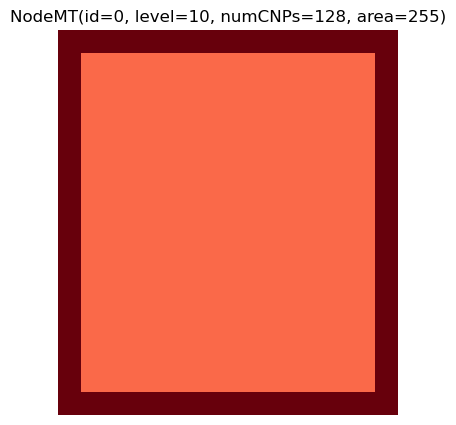

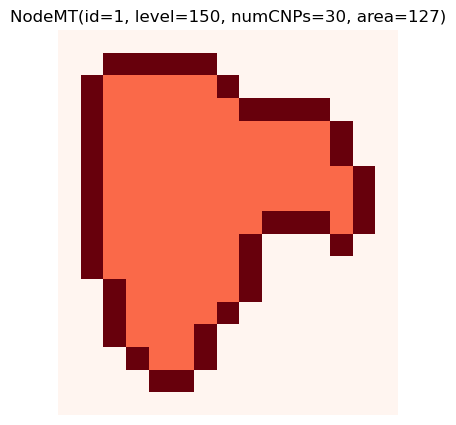

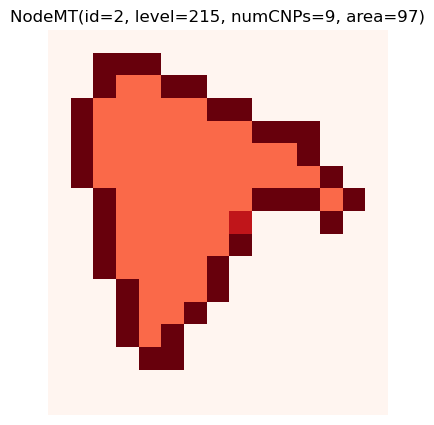

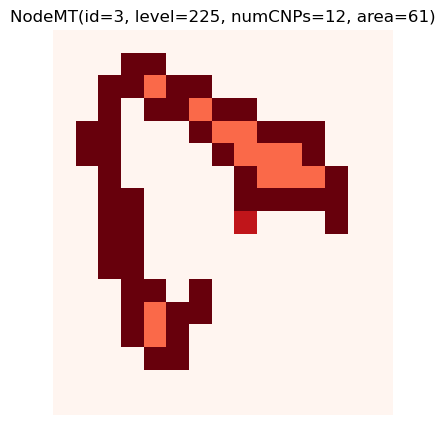

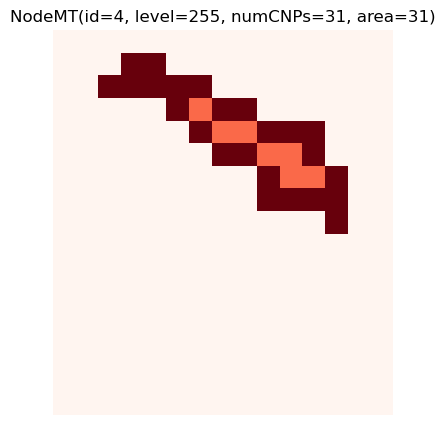

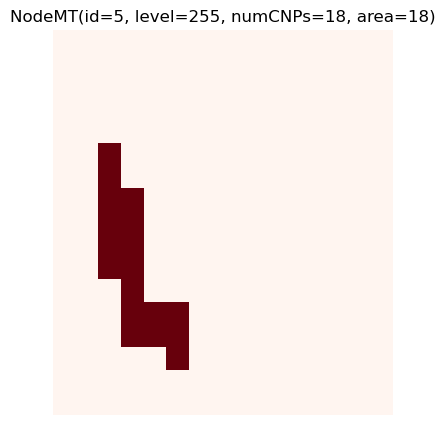

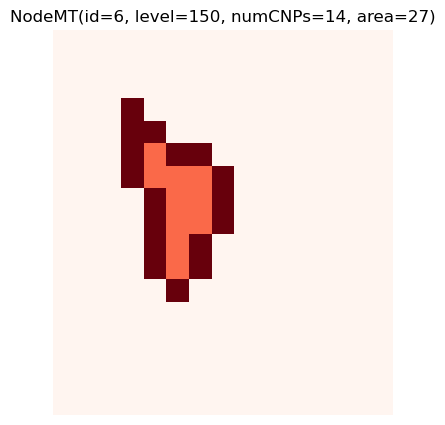

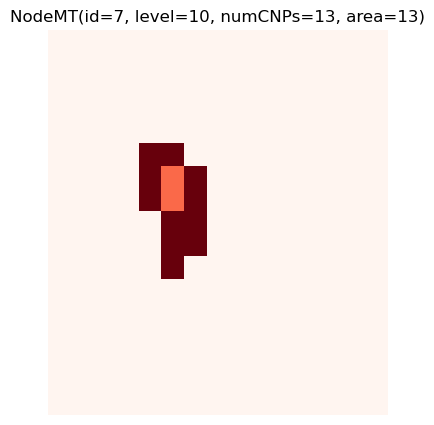

In [21]:
for (nodeId, contour) in mtCountors.contours():
    plotCountors(contour, tos.getNode(nodeId), num_rows, num_cols)

# Exemplo do último caso

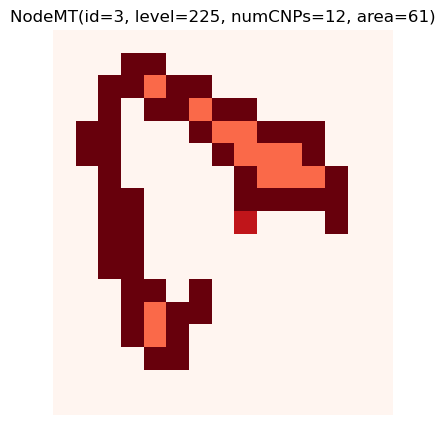

In [24]:
#1. Ao processar
node = nodes[3]
plotCountors(mtCountors.getContour(node.id), node, num_rows, num_cols)

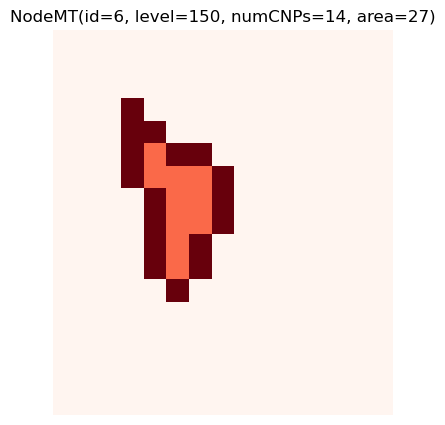

In [26]:
#2. Encontrou um vizinho não comparavel
node = nodes[6]
plotCountors(mtCountors.getContour(node.id), node, num_rows, num_cols)

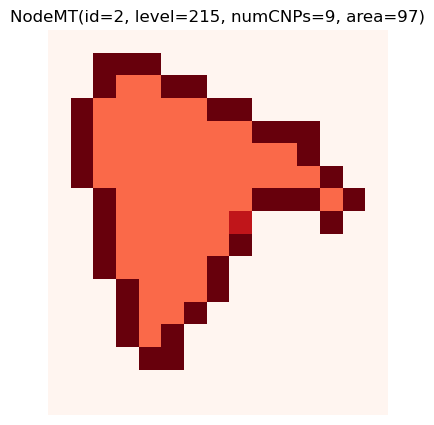

In [28]:
#3. LCA
node = nodes[2]
plotCountors(mtCountors.getContour(node.id), node, num_rows, num_cols)

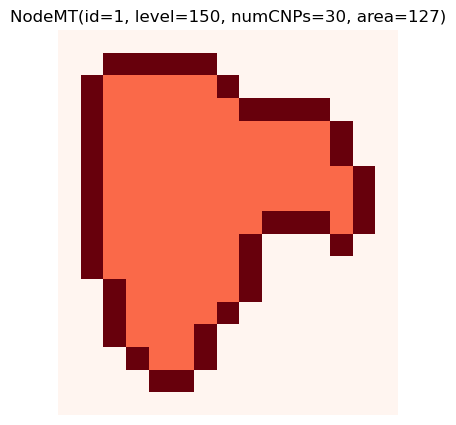

In [30]:
#4. O pixel a ser removido, é um pixel do contorno de um ancestral do LCA => aqui é propagado o pixel para ser removido no ancestral
node = nodes[1]
plotCountors(mtCountors.getContour(node.id), node, num_rows, num_cols)